### Import Libraries

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

### Project Assigning/Information Gathering

In [ ]:
Client/Stakeholder         >> Person
Project                    >> Car (Service= Testing, Web Development, Games, Automation)
Company                    >> Car Company
POC(Proof of Concept)      >> Test Drive

POC >> Paid POC/Non-Paid
Duaration >> 1 week to 4 weeks, rarely (2-3 months)
POC started >> 23-11-24

Sensitive Data(Info):
    NDA(Non-Disclosure Agreement)

Data:
    Download >> Less Observations
    Access (SQL-Server) >> Limited Access

Problem Statement >> Solution
Output >> Deliverables

Client Meeting >> Create PPT/Deck/Excel
Requirements >> Set of features to use:
    1. Frequency of Customers
    2. Nearby Hotels
    3. Area measurements
    4. Locations
    5. Veg/Non-Veg
    6. Indian/Foreign
    7. Ambiance
    8. Price
    9. Type of Place
    10. Liqour

Approaches:
    ML(Regression, Classification, Segmentation)
    DL
    NLP
    TSA
    Chatbot
    Gen AI
    Without ML(Rule Based)

To discusss anything with Client side:
    POC/SPOC >>> Single Point of Contact

POC-Closure(Delivered) >> 15-12-2024

POC will be reviewed by Client

Project Kickoff >> 22-12-2024

### Problem Statement/Business Problem

In [ ]:
To predict SepalLengthCM values with the help of independent variables

Dependent Var >> SepalLengthCM
Indepedent Var >> SepatlWidthCM, PetalWidthCM, PetalLengthCM, Species

# Hypothesis(Assumptions) Generation

### Data Gathering

In [5]:
iris_data = load_iris()
print(dir(iris_data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [6]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['Species'] = iris_data.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Exploratory Data Analysis

In [8]:
iris_df.shape

(150, 5)

In [9]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [11]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris_df.columns = ['SepalLengthCM','SepatlWidthCM', 'PetalLengthCM','PetalWidthCM', 'Species']
iris_df.head()

,SepalLengthCM,SepatlWidthCM,PetalLengthCM,PetalWidthCM,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
3 types of EDA:
    1. Univariate >> Analysis of single variable
    2. Bivariate  >> Analyse 2 var at a time
    3. Multivariate >> Analyse multiple features at a time

Categorical:
    unique, nunique, valuecounts, piechart, countplot, bargraph

Numerical:
    nunique, kdeplot, histogram, boxplot, statistical values

#### 3.1 SepatlWidthCM

In [17]:
iris_df['SepatlWidthCM'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [18]:
iris_df['SepatlWidthCM'].nunique()

23

<Axes: xlabel='SepatlWidthCM', ylabel='Count'>

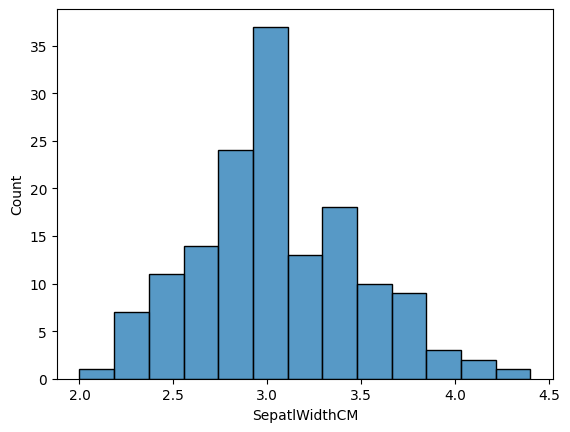

In [19]:
sns.histplot(iris_df['SepatlWidthCM'])

<Axes: xlabel='SepatlWidthCM', ylabel='Density'>

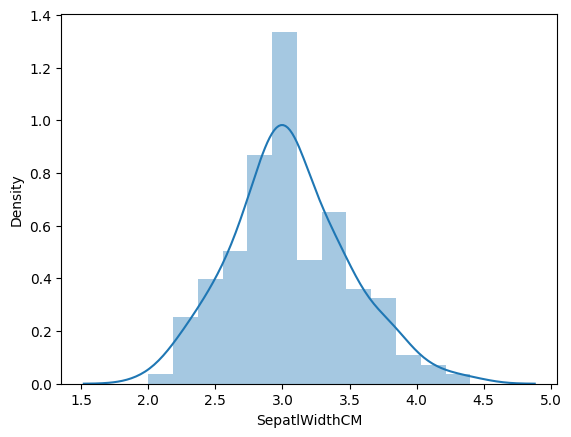

In [20]:
sns.distplot(iris_df['SepatlWidthCM'])

<Axes: xlabel='SepatlWidthCM', ylabel='Density'>

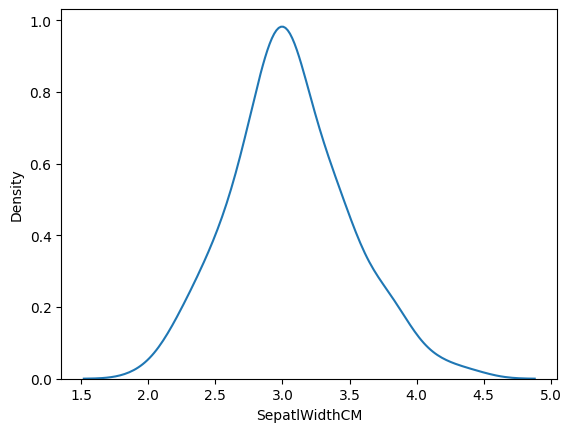

In [21]:
sns.kdeplot(iris_df['SepatlWidthCM'])

<Axes: xlabel='SepatlWidthCM', ylabel='count'>

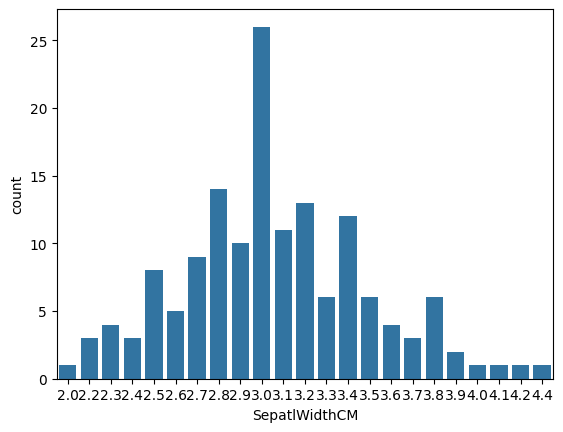

In [23]:
sns.countplot(x=iris_df['SepatlWidthCM'])

<Axes: ylabel='SepatlWidthCM'>

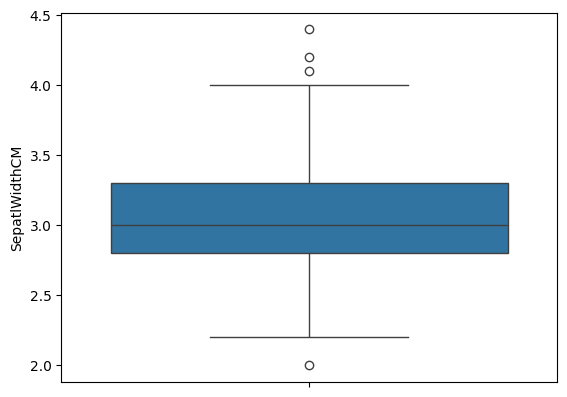

In [24]:
sns.boxplot(iris_df['SepatlWidthCM'])

##### Conclusion : Outliers need to be trated

#### 3.2 PetalLengthCM

In [25]:
iris_df['PetalLengthCM']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCM, Length: 150, dtype: float64

<Axes: xlabel='PetalLengthCM', ylabel='Density'>

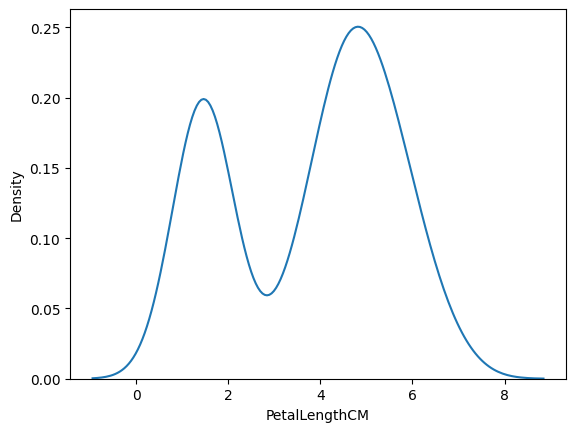

In [26]:
sns.kdeplot(iris_df['PetalLengthCM'])

<Axes: xlabel='PetalLengthCM', ylabel='Density'>

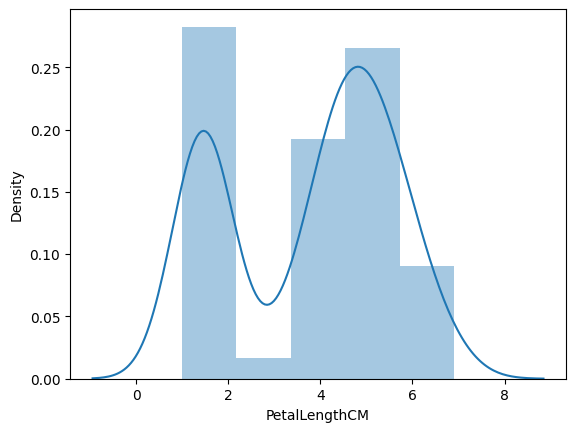

In [28]:
sns.distplot(iris_df['PetalLengthCM'])

<Axes: ylabel='PetalLengthCM'>

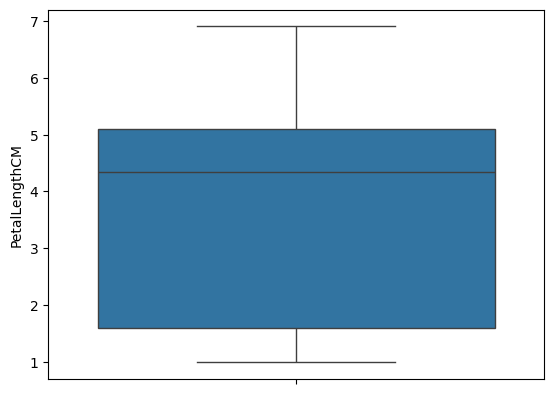

In [29]:
sns.boxplot(iris_df['PetalLengthCM'])

In [36]:
iris_df['PetalLengthCM'].skew()

-0.27488417975101276

##### Conclusion : This feature may require transformation

#### 3.3 PetalWidthCM

In [30]:
iris_df['PetalWidthCM']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCM, Length: 150, dtype: float64

<Axes: xlabel='PetalWidthCM', ylabel='Count'>

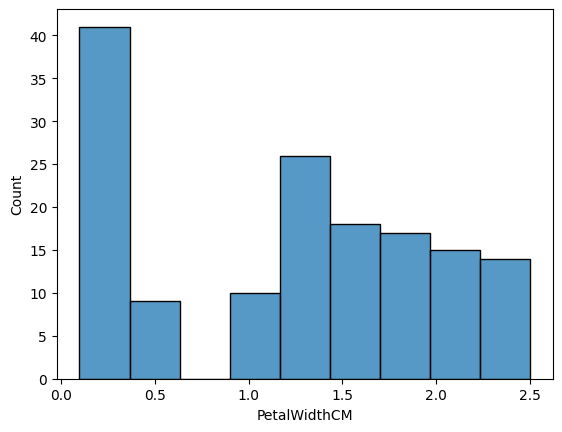

In [31]:
sns.histplot(iris_df['PetalWidthCM'])

<Axes: xlabel='PetalWidthCM', ylabel='Density'>

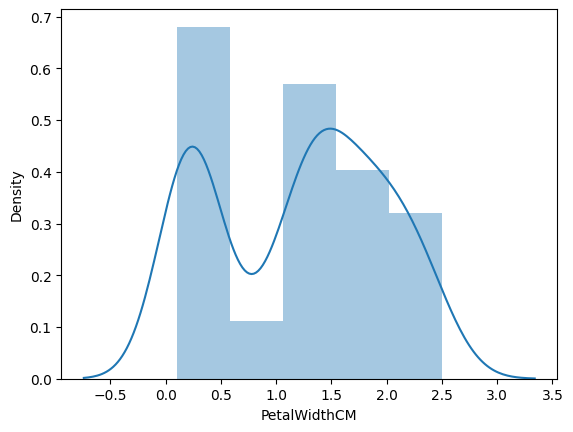

In [32]:
sns.distplot(iris_df['PetalWidthCM'])

<Axes: xlabel='PetalWidthCM', ylabel='Density'>

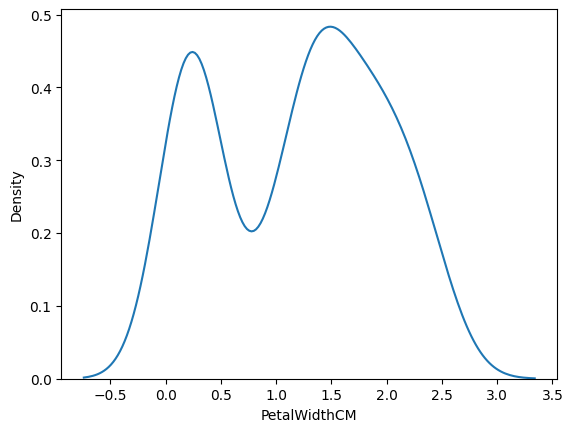

In [33]:
sns.kdeplot(iris_df['PetalWidthCM'])

<Axes: ylabel='PetalWidthCM'>

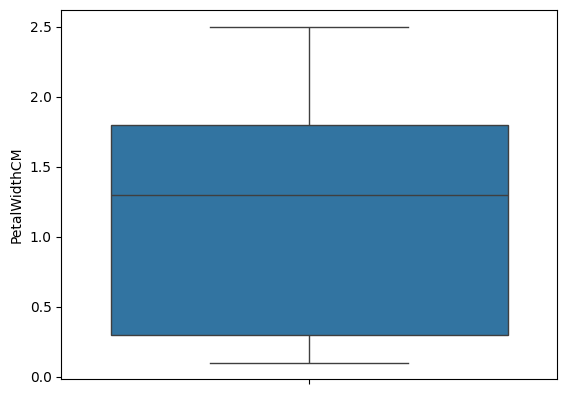

In [34]:
sns.boxplot(iris_df['PetalWidthCM'])

In [35]:
iris_df['PetalWidthCM'].skew()

-0.10296674764898116

##### Conclusion : This feature may require transformation

#### 3.4 Species

In [38]:
iris_df['Species'].unique()

array([0, 1, 2])

In [39]:
iris_df['Species'].nunique()

3

In [40]:
iris_df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

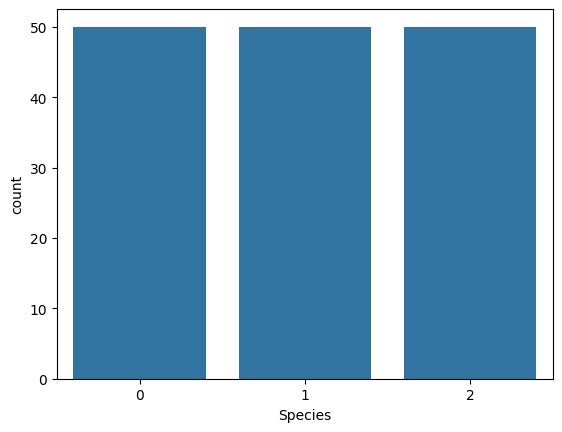

In [44]:
sns.countplot(x=iris_df['Species'], )

### Feature Engineering

#### Feature Selection

##### Linearity

In [45]:
iris_df.cov()     # Covariance Matrix

,SepalLengthCM,SepatlWidthCM,PetalLengthCM,PetalWidthCM,Species
SepalLengthCM,0.685694,-0.042434,1.274315,0.516271,0.530872
SepatlWidthCM,-0.042434,0.189979,-0.329656,-0.121639,-0.152349
PetalLengthCM,1.274315,-0.329656,3.116278,1.295609,1.372483
PetalWidthCM,0.516271,-0.121639,1.295609,0.581006,0.597315
Species,0.530872,-0.152349,1.372483,0.597315,0.671141


In [46]:
iris_df.std()

SepalLengthCM    0.828066
SepatlWidthCM    0.435866
PetalLengthCM    1.765298
PetalWidthCM     0.762238
Species          0.819232
dtype: float64

In [47]:
iris_df.var()

SepalLengthCM    0.685694
SepatlWidthCM    0.189979
PetalLengthCM    3.116278
PetalWidthCM     0.581006
Species          0.671141
dtype: float64

In [48]:
iris_df.corr()

,SepalLengthCM,SepatlWidthCM,PetalLengthCM,PetalWidthCM,Species
SepalLengthCM,1.000000,-0.117570,0.871754,0.817941,0.782561
SepatlWidthCM,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
PetalLengthCM,0.871754,-0.428440,1.000000,0.962865,0.949035
PetalWidthCM,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: xlabel='SepalLengthCM', ylabel='SepalLengthCM'>

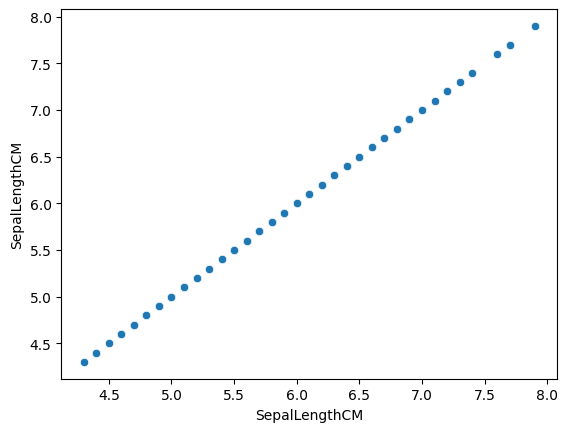

In [50]:
sns.scatterplot(x =iris_df['SepalLengthCM'], y =iris_df['SepalLengthCM'])

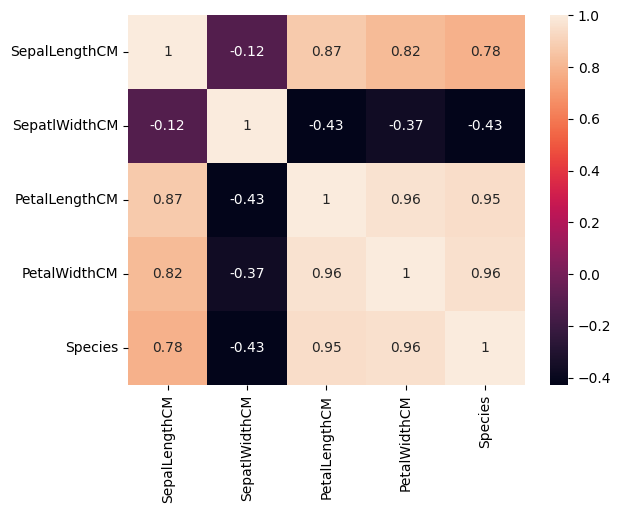

In [55]:
sns.heatmap(iris_df.corr(), annot=True)
plt.savefig('Correlation_matrix.jpg')

In [58]:
correlation = iris_df.corr().head(1)
correlation

,SepalLengthCM,SepatlWidthCM,PetalLengthCM,PetalWidthCM,Species
SepalLengthCM,1.0,-0.11757,0.871754,0.817941,0.782561


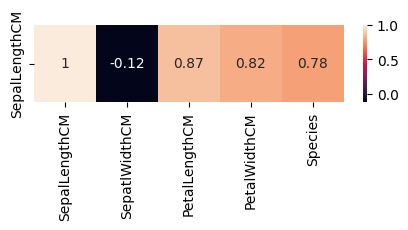

In [60]:
plt.figure(figsize=(5,1))
sns.heatmap(correlation, annot=True)
plt.savefig('Correlation_target.jpg')

<Axes: xlabel='PetalLengthCM', ylabel='SepalLengthCM'>

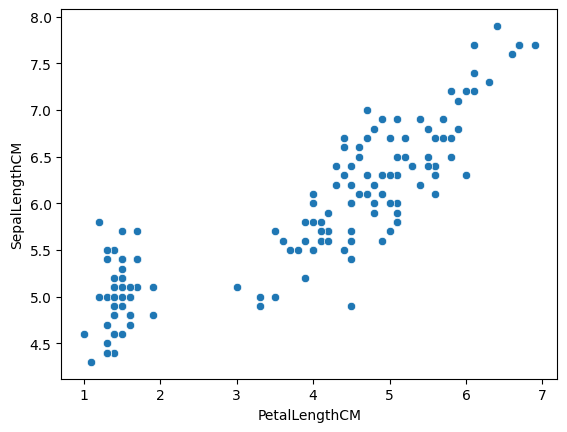

In [61]:
sns.scatterplot(y =iris_df['SepalLengthCM'], x =iris_df['PetalLengthCM'])

<Axes: xlabel='SepatlWidthCM', ylabel='SepalLengthCM'>

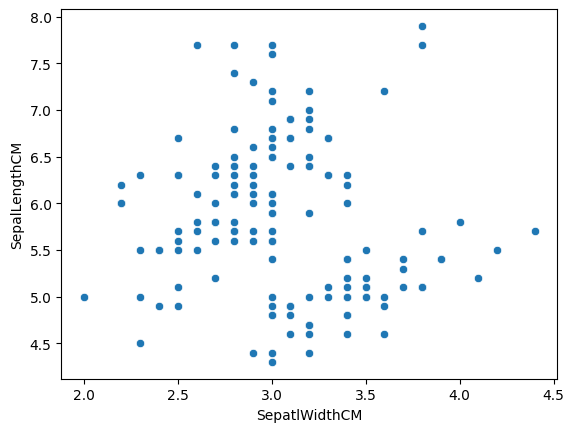

In [62]:
sns.scatterplot(y =iris_df['SepalLengthCM'], x =iris_df['SepatlWidthCM'])

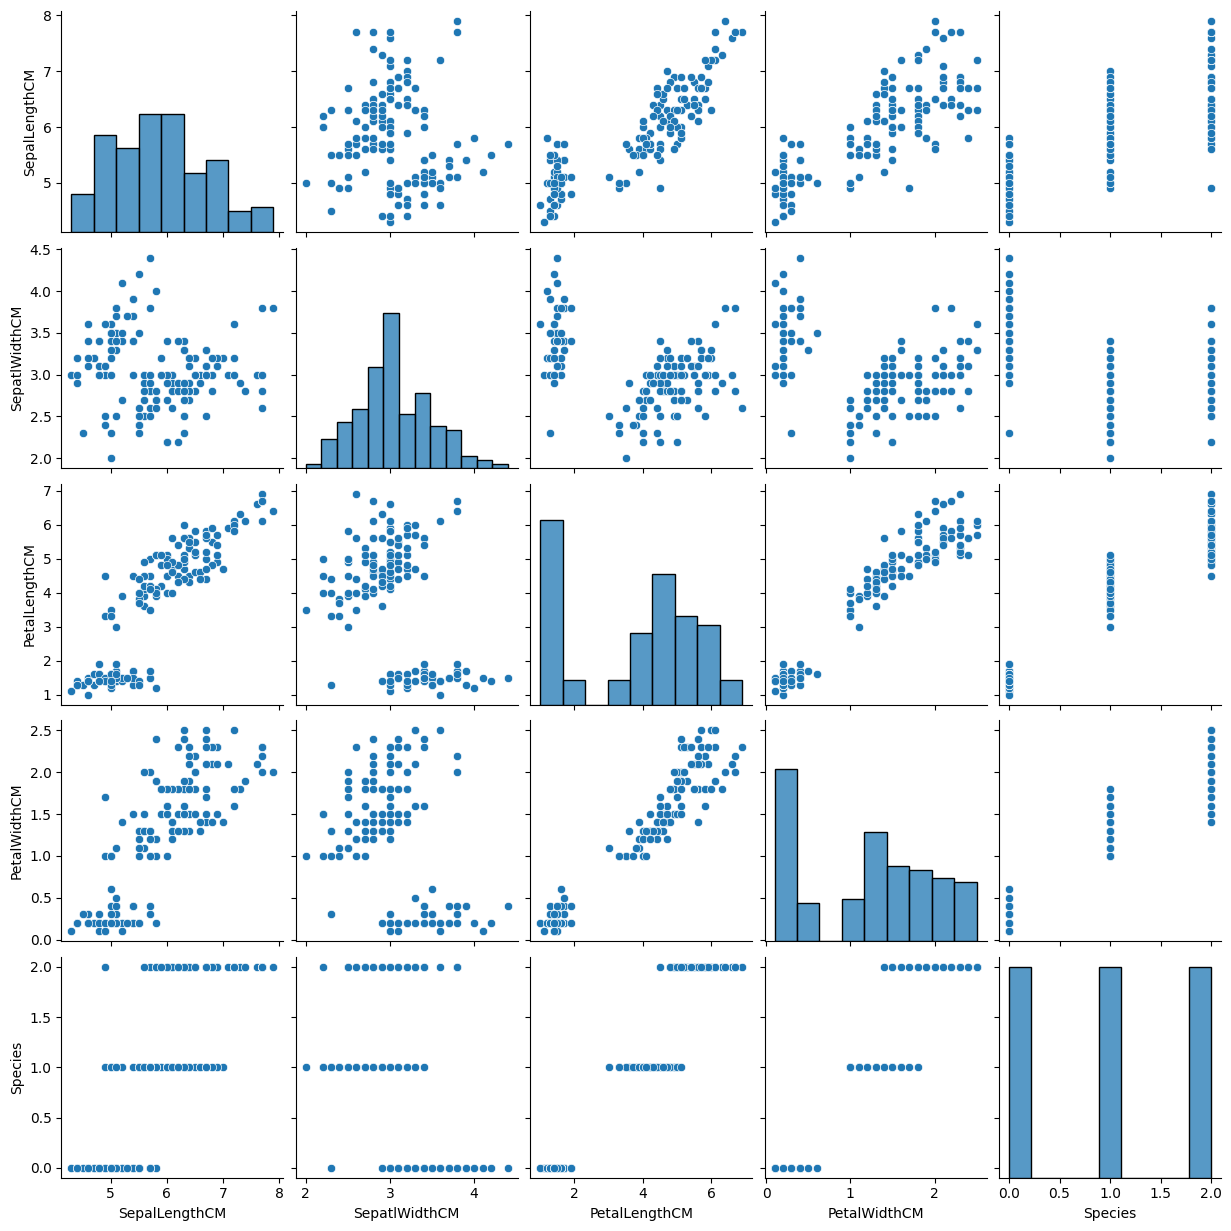

In [63]:
sns.pairplot(iris_df)

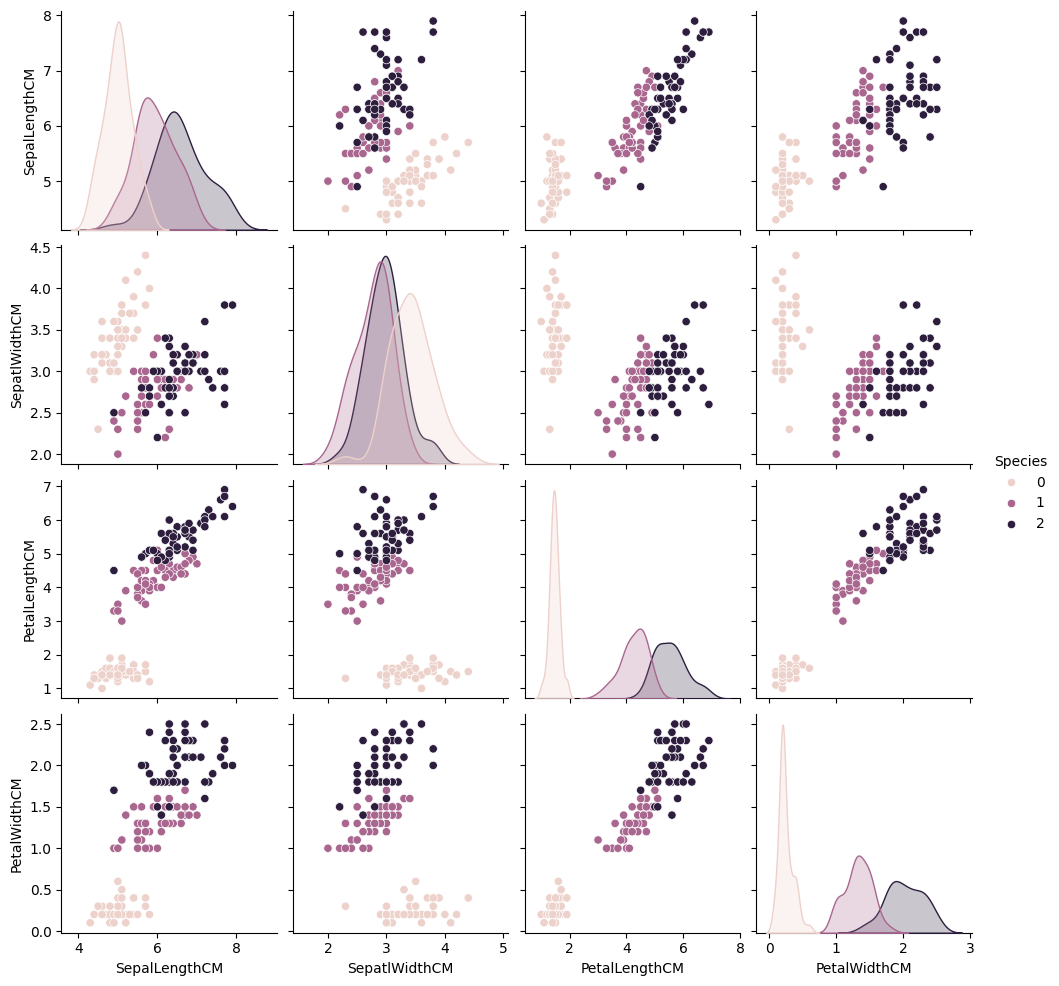

In [64]:
sns.pairplot(iris_df, hue = 'Species')

#### No Multicolinearity

In [ ]:
VIF >> Variance Inflation Factor

In [70]:
iris_df.columns

Index(['SepalLengthCM', 'SepatlWidthCM', 'PetalLengthCM', 'PetalWidthCM',
       'Species'],
      dtype='object')

In [75]:
for i in range(1, iris_df.shape[1]):
    vif = variance_inflation_factor(iris_df.values, i)
    print(f'VIF of {iris_df.columns[i]} is : {vif}')

VIF of SepatlWidthCM is : 96.46673090053491
VIF of PetalLengthCM is : 191.61705308519376
VIF of PetalWidthCM is : 71.03519530845257
VIF of Species is : 35.71225297716894


### Model Training/Building

In [76]:
x = iris_df.drop('SepalLengthCM', axis = 1)  # 2D
y = iris_df['SepalLengthCM']   # 1D

In [77]:
x.head()

,SepatlWidthCM,PetalLengthCM,PetalWidthCM,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [78]:
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: SepalLengthCM, dtype: float64

### Splitting dataset into train and test

##### Train test split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=2)
x_train

,SepatlWidthCM,PetalLengthCM,PetalWidthCM,Species
54,2.8,4.6,1.5,1
41,2.3,1.3,0.3,0
96,2.9,4.2,1.3,1
144,3.3,5.7,2.5,2
89,2.5,4.0,1.3,1
...,...,...,...,...
75,3.0,4.4,1.4,1
43,3.5,1.6,0.6,0
22,3.6,1.0,0.2,0
72,2.5,4.9,1.5,1


In [103]:
x_test.shape

(15, 4)

In [104]:
y_train.shape

(135,)

In [105]:
y_test.shape

(15,)